In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
transactions = pd.read_excel(r'./Desktop/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', header=1)
cust_Demog = pd.read_excel(r'./Desktop/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', header=1)
cust_Ad = pd.read_excel(r'./Desktop/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', header=1)

C:\Program Files\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


In [4]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
transactions.online_order.unique()

array([ 0.,  1., nan])

In [6]:
transactions.shape

(20000, 13)

In [35]:
transactions = transactions.astype({'transaction_id': 'str', 'product_id': 'str', 'customer_id': 'str', 'online_order': 'category'})

In [64]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%Y-%m-%d')

In [10]:
transactions.dtypes

transaction_id                     object
product_id                         object
customer_id                        object
transaction_date           datetime64[ns]
online_order                     category
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [13]:
transactions.describe(datetime_is_numeric=True)

,transaction_date,list_price,standard_cost,product_first_sold_date
count,20000,20000.000000,19803.000000,19803.000000
mean,2017-07-01 14:08:05.280000,1107.829449,556.046951,38199.776549
min,2017-01-01 00:00:00,12.010000,7.210000,33259.000000
25%,2017-04-01 00:00:00,575.270000,215.140000,35667.000000
50%,2017-07-03 00:00:00,1163.890000,507.580000,38216.000000
75%,2017-10-02 00:00:00,1635.300000,795.100000,40672.000000
max,2017-12-30 00:00:00,2091.470000,1759.850000,42710.000000
std,NaN,582.825242,405.955660,2875.201110


In [16]:
transactions.describe(exclude=np.number, datetime_is_numeric=True).loc[['count', 'unique', 'top', 'freq'],:]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size
count,20000,20000,20000,20000,19640.0,20000,19803,19803,19803,19803
unique,20000,101,3494,NaN,2.0,2,6,4,3,3
top,1,0,2183,NaN,1.0,Approved,Solex,Standard,medium,medium
freq,1,1378,14,NaN,9829.0,19821,4253,14176,13826,12990


In [17]:
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

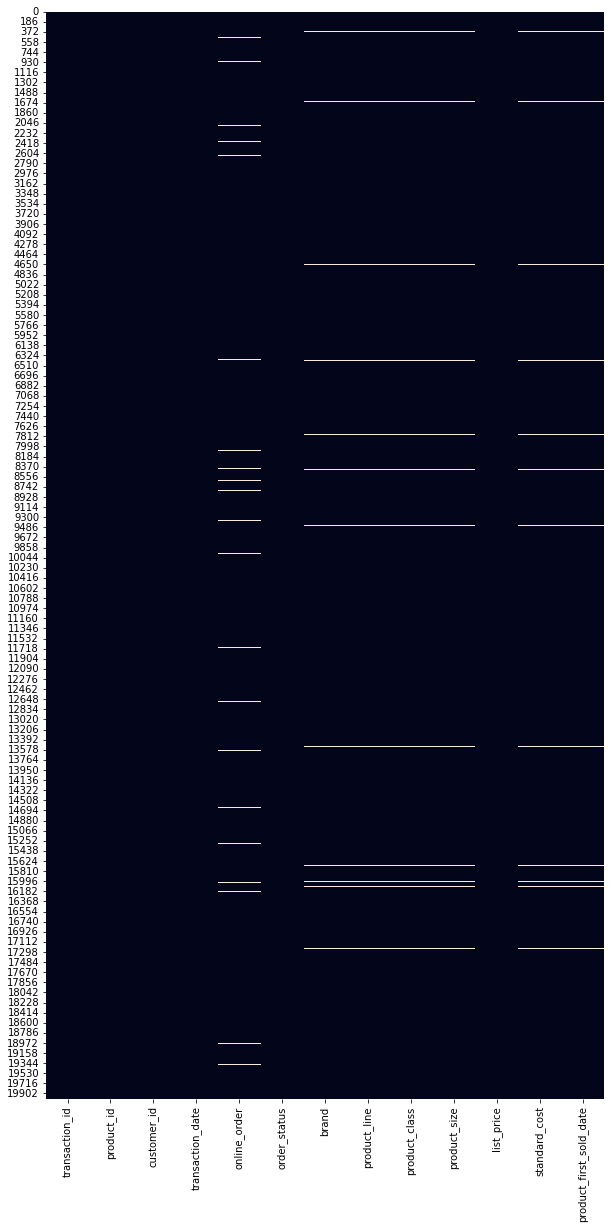

In [53]:
plt.figure(figsize=(10, 20))
sns.heatmap(transactions.isna(), cbar=False);

In [18]:
4000-3494

506

In [19]:
cust_Demog.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [53]:
cust_Demog.shape

(4000, 13)

In [20]:
cust_Demog.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [33]:
cust_Demog = cust_Demog.astype({'customer_id':'str'})

In [22]:
cust_Demog.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [26]:
cust_Demog.describe(datetime_is_numeric=True)

,past_3_years_bike_related_purchases,DOB,tenure
count,4000.000000,3913,3913.000000
mean,48.890000,1977-07-12 23:56:41.277792,10.657041
min,0.000000,1843-12-21 00:00:00,1.000000
25%,24.000000,1968-01-22 00:00:00,6.000000
50%,48.000000,1977-07-22 00:00:00,11.000000
75%,73.000000,1987-02-28 00:00:00,15.000000
max,99.000000,2002-03-11 00:00:00,22.000000
std,28.715005,NaN,5.660146


In [25]:
cust_Demog.describe(exclude=np.number, datetime_is_numeric=True).loc[['count', 'unique', 'top', 'freq'],:]

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,4000,3875,4000,3913,3494,3344,4000,4000,3698.0,4000
unique,4000,3139,3725,6,NaN,195,9,3,2,90.0,2
top,1,Max,Pristnor,Female,NaN,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100.0,Yes
freq,1,5,3,2037,NaN,45,799,2000,3998,113.0,2024


In [14]:
cust_Demog.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [17]:
def gender(x):
    if x == 'Male':
        return 'M'
    elif x == 'Female':
        return 'F'
    elif x == 'Femal':
        return 'F'
    elif x == 'U':
        return np.nan
    else: return x
cust_Demog['gender'].apply(gender).unique()

array(['F', 'M', nan], dtype=object)

In [18]:
cust_Demog['gender'] = cust_Demog['gender'].apply(gender)

In [19]:
cust_Demog[cust_Demog['DOB']=='1843-12-21']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,NaN,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


In [21]:
cust_Demog['DOB'].replace('1843-12-21', np.nan, inplace=True)

In [23]:
cust_Demog['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [24]:
cust_Demog.drop(columns=['default'], inplace=True)

In [29]:
year_born = cust_Demog.DOB.dt.year
cust_Demog['age_at_2017'] = 2017 - year_born

In [37]:
cust_Demog.set_index('customer_id', inplace=True)

In [65]:
cust_Demog['DOB'] = pd.to_datetime(cust_Demog['DOB'], format='%Y-%m-%d')

In [40]:
cust_Demog_index_new = list(set.intersection(set(cust_Demog.index.values), set(transactions.customer_id.values)))

In [41]:
len(cust_Demog_index_new)

3493

In [44]:
cust_Demog = cust_Demog.loc[cust_Demog_index_new, :]

In [61]:
cust_Demog.reset_index(inplace=True)

In [28]:
cust_Demog.deceased_indicator.unique()

array(['N', 'Y'], dtype=object)

<AxesSubplot:xlabel='deceased_indicator', ylabel='count'>

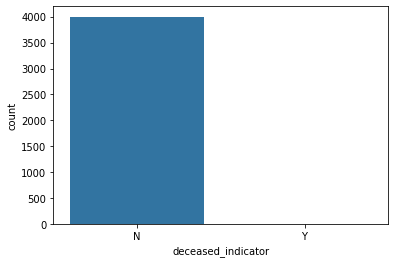

In [29]:
sns.countplot(data=cust_Demog, x = 'deceased_indicator');

In [30]:
cust_Demog.deceased_indicator.value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [59]:
cust_Ad.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [54]:
cust_Ad = cust_Ad.astype({'customer_id': 'str', 'postcode': 'str'})

In [63]:
cust_Ad.dtypes

customer_id           object
address               object
postcode              object
state                 object
country               object
property_valuation     int64
dtype: object

In [64]:
cust_Ad.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [68]:
cust_Ad.describe(exclude=np.number)

,customer_id,address,postcode,state,country
count,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1
top,2383,3 Talisman Place,2170,NSW,Australia
freq,1,2,31,2054,3999


In [69]:
cust_Ad[cust_Ad.duplicated(subset=['address'], keep=False)]

,customer_id,address,postcode,state,country,property_valuation
732,737,3 Talisman Place,4811,QLD,Australia,2
2315,2320,64 Macpherson Junction,2208,NSW,Australia,11
2328,2333,3 Mariners Cove Terrace,3108,VIC,Australia,10
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


In [70]:
cust_Ad.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [49]:
def state(x):
    if x == 'New South Wales':
        return 'NSW'
    elif x == 'Victoria':
        return 'VIC'
    else: return x
cust_Ad.state.apply(state).unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [50]:
cust_Ad.state = cust_Ad.state.apply(state)

In [55]:
cust_Ad.set_index('customer_id', inplace=True)

In [56]:
cust_Ad_index_new = list(set.intersection(set(cust_Ad.index.values), set(transactions.customer_id.values)))

In [59]:
cust_Ad.reset_index(inplace=True)

In [66]:
writer = pd.ExcelWriter('KPMG_VI_New_raw_data_update_final.xlsx', engine='xlsxwriter')
cust_Ad.to_excel(writer, 'CustomerAddress', index=False)
cust_Demog.to_excel(writer, 'CustomerDemographic', index=False)
transactions.to_excel(writer, 'Transactions', index=False)
writer.save()